#INDENG 142 Introduction to Machine Learning: Final Project



In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import collections
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mvp_df = pd.read_csv("/content/drive/MyDrive/INDENG142/mvp.csv")
players_df = pd.read_csv('/content/drive/MyDrive/INDENG142/players.csv')
team_df = pd.read_csv('/content/drive/MyDrive/INDENG142/teams.csv')

Cleaning players dataframe:

In [ ]:
players_df.head()

,Unnamed: 0.1,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,2,3,Mark Acres,C,28,ORL,68,0,19.3,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [ ]:
del players_df['Unnamed: 0']
del players_df['Unnamed: 0.1']
del players_df['Rk']

In [ ]:
players_df['Player'] = players_df['Player'].str.replace("*", "", regex= False)

In [ ]:
players_df[players_df['Tm']  == 'TOT']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
26,Kenny Battle,SG,26,TOT,56,8,16.9,2.4,5.0,.472,...,1.5,1.7,3.1,1.1,1.1,0.3,0.9,1.9,6.1,1991
30,Benoit Benjamin,C,26,TOT,70,65,31.9,5.5,11.1,.496,...,2.2,8.1,10.3,1.7,0.8,2.1,3.4,2.6,14.0,1991
49,Tony Brown,SG-SF,30,TOT,30,0,9.8,1.0,2.7,.375,...,0.8,0.6,1.4,0.5,0.1,0.0,0.5,1.6,2.8,1991
77,Lester Conner,PG,31,TOT,74,4,13.6,1.3,2.8,.464,...,0.3,1.2,1.5,2.2,1.1,0.0,0.8,1.0,3.5,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17997,Moritz Wagner,C,23,TOT,45,24,16.0,2.3,5.1,.454,...,0.6,2.6,3.2,1.1,0.6,0.4,1.0,2.4,6.9,2021
18004,Brad Wanamaker,PG,31,TOT,61,0,17.3,1.9,4.9,.385,...,0.3,1.4,1.7,2.9,0.7,0.2,1.2,1.5,5.5,2021
18022,Lou Williams,PG,34,TOT,66,4,21.6,4.0,9.8,.410,...,0.3,1.8,2.1,3.4,0.7,0.1,1.6,0.9,11.3,2021
18028,D.J. Wilson,PF,24,TOT,35,1,12.4,1.9,4.8,.405,...,0.6,2.6,3.2,0.7,0.3,0.5,0.6,1.3,5.2,2021


In [ ]:
def one_row(df):
  if df.shape[0] == 1:
    return df
  else:
    row = df[df['Tm'] == 'TOT']
    row['Tm'] = df.iloc[-1, :]['Tm']
    return row

players_df= players_df.groupby(['Player', 'Year']).apply(one_row)

In [ ]:
players_df.index = players_df.index.droplevel()
players_df.index = players_df.index.droplevel()
players_df.head(20)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2563,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
3138,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
3725,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
4283,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
4811,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,2.0,4.0,5.9,1.0,0.6,0.2,0.6,1.5,5.0,2000


In [ ]:
players_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995


# Cleaning MVP dataframe:

In [ ]:
mvp_df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [ ]:
mvp_df = mvp_df[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share', 'Rank']]

In [ ]:
mvp_df.head()

,Player,Year,Pts Won,Pts Max,Share,Rank
0,Michael Jordan,1991,891.0,960,0.928,1
1,Magic Johnson,1991,497.0,960,0.518,2
2,David Robinson,1991,476.0,960,0.496,3
3,Charles Barkley,1991,222.0,960,0.231,4
4,Karl Malone,1991,142.0,960,0.148,5


# Cleaning Team dataframe

In [ ]:
team_df.head()

,Unnamed: 0.1,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [ ]:
del team_df['Unnamed: 0']
del team_df['Unnamed: 0.1']

In [ ]:
team_df['Team'] = team_df['Team'].str.replace("*", "", regex= False)

In [ ]:
team_df['Team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Central Division', 'Chicago Bulls', 'Detroit Pistons',
       'Milwaukee Bucks', 'Atlanta Hawks', 'Indiana Pacers',
       'Cleveland Cavaliers', 'Charlotte Hornets', 'Midwest Division',
       'San Antonio Spurs', 'Utah Jazz', 'Houston Rockets',
       'Orlando Magic', 'Minnesota Timberwolves', 'Dallas Mavericks',
       'Denver Nuggets', 'Pacific Division', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Southeast Division',
       'Charlotte Bobcats', 'Northwest Division', 'Southwest Division',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans']

In [ ]:
team_df = team_df.sort_values(by= 'Team', ascending= True)
team_df['Team'].unique()

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Central Division', 'Charlotte Bobcats', 'Charlotte Hornets',
       'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks',
       'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors',
       'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers',
       'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
       'Midwest Division', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Jersey Nets', 'New Orleans Hornets', 'New Orleans Pelicans',
       'New Orleans/Oklahoma City Hornets', 'New York Knicks',
       'Northwest Division', 'Oklahoma City Thunder', 'Orlando Magic',
       'Pacific Division', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Seattle SuperSonics', 'Southeast Division', 'Southwest Division',
       'Toronto Raptors', 'Utah Jazz', 'Vancouver Grizzlies',
       'Washington Bullets', 'Washington Wizards']

In [ ]:
team_df = team_df[~team_df['W'].str.contains('Division')]

In [ ]:
read_file = pd.read_csv ('/content/drive/MyDrive/INDENG142/Abbreviation,Name.txt')
read_file.to_csv ('/content/drive/MyDrive/INDENG142/Abbreviation,Name.csv', index=None)

In [ ]:
abbrev = {}

with open("/content/drive/MyDrive/INDENG142/AbbreviationName.csv") as f:
  lines = f.readlines()
  for line in lines[2:]:
    abb, name = line.replace('\n', '').split(',')
    abbrev[abb] = name

In [ ]:
abbrev

{'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spurs',
 'TOR': 'Toronto Rap

In [ ]:
team_df.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
626,53,29,.646,6.0,101.7,97.0,4.44,2010,Atlanta Hawks
909,24,58,.293,20.0,103.4,108.8,-5.30,2018,Atlanta Hawks
420,28,54,.341,33.0,92.8,97.5,-5.00,2004,Atlanta Hawks
731,44,38,.537,22.0,98.0,97.5,-0.08,2013,Atlanta Hawks
98,57,25,.695,—,101.4,96.2,4.94,1994,Atlanta Hawks


Merge players df with mvp df

In [ ]:
merged_df = players_df.merge(mvp_df, how= 'outer', on= ['Player', 'Year'])

In [ ]:

merged_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Rank
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN,NaN
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN,NaN
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN,NaN
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN,NaN
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN


In [ ]:
merged_df["Team"] = merged_df["Tm"].map(abbrev)

In [ ]:
merged_df.head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Rank,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN,NaN,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN,NaN,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN,NaN,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN,NaN,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN,Phoenix Suns
5,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN,Phoenix Suns
6,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN,Dallas Mavericks
7,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN,Dallas Mavericks
8,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN,Dallas Mavericks
9,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.2,0.6,1.5,5.0,2000,NaN,NaN,NaN,NaN,Los Angeles Lakers


Clean NaN values from df:

In [ ]:
#possibly change nan vals to median

In [ ]:
merged_df[['Pts Won', 'Pts Max', 'Share']] = merged_df[['Pts Won', 'Pts Max', 'Share']].fillna(0)

In [ ]:
merged_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Rank,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,NaN,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,NaN,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,NaN,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,NaN,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,NaN,Phoenix Suns


In [ ]:
merged_df['Team'] = merged_df['Tm'].map(abbrev)

In [ ]:
merged_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Rank,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,NaN,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,NaN,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,NaN,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,NaN,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,NaN,Phoenix Suns


In [ ]:
merged_df = merged_df.dropna()

In [ ]:
statistics_df = merged_df.merge(team_df, how= 'left', on=['Team', 'Year'])

In [ ]:
statistics_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Rank,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,0.027,8,Charlotte Bobcats,43,39,.524,11.0,96.9,97.1,-0.89
1,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,0.001,17T,Philadelphia 76ers,22,60,.268,39.0,100.2,106.7,-5.89
2,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,0.270,4,Philadelphia 76ers,28,22,.560,5.0,89.7,87.6,2.56
3,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,0.109,7,Philadelphia 76ers,49,33,.598,3.0,94.8,93.4,1.02
4,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,0.904,1,Philadelphia 76ers,56,26,.683,—,94.7,90.4,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,0.042,10,Toronto Raptors,45,37,.549,11.0,97.2,97.3,-0.46
451,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,0.006,11T,Toronto Raptors,47,35,.573,5.0,97.6,95.4,1.69
452,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,0.002,13,New Jersey Nets,42,40,.512,3.0,91.4,92.9,-1.82
453,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,0.001,14T,Houston Rockets,45,37,.549,13.0,89.8,88.0,2.28


In [ ]:
statistics_df.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Rank        object
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [ ]:
statistics_df = statistics_df.apply(pd.to_numeric, errors= 'ignore')

In [ ]:
statistics_df['GB'] = statistics_df['GB'].str.replace("—", "0")

In [ ]:
statistics_df['GB'] = pd.to_numeric(statistics_df['GB'])

In [ ]:
statistics_df.to_csv('mvp_player_stats.csv')

In [ ]:
top_10_scorers = statistics_df[statistics_df['G'] > 60].sort_values('PTS', ascending = False).head(10)

Text(0.5, 1.0, 'Top 10 Scorers with over 60 Games')

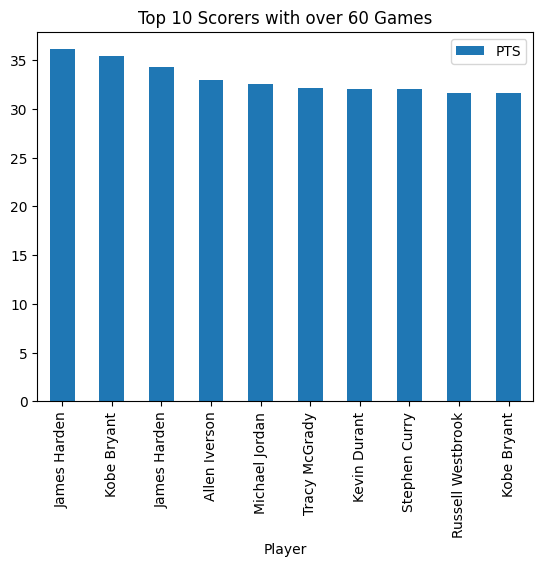

In [ ]:
top_10_scorers.plot.bar('Player', 'PTS')
plt.title("Top 10 Scorers with over 60 Games")

In [ ]:
statistics_df[statistics_df['Player'] == 'Tracy McGrady']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Rank,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
440,Tracy McGrady,SG,21,ORL,77,77,40.1,10.2,22.4,0.457,...,0.052,6,Orlando Magic,43,39,0.524,13.0,97.5,96.5,0.39
441,Tracy McGrady,SG,22,ORL,76,76,38.3,9.4,20.9,0.451,...,0.310,4,Orlando Magic,44,38,0.537,8.0,100.5,98.9,1.25
442,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,0.359,4,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
443,Tracy McGrady,SF,25,HOU,78,78,40.8,9.2,21.3,0.431,...,0.035,7,Houston Rockets,51,31,0.622,8.0,95.1,91.0,4.27
444,Tracy McGrady,SG,27,HOU,71,71,35.8,9.0,20.8,0.431,...,0.085,6,Houston Rockets,52,30,0.634,15.0,97.0,92.1,5.04
445,Tracy McGrady,SG,28,HOU,66,62,37.0,8.3,19.8,0.419,...,0.015,8,Houston Rockets,55,27,0.671,1.0,96.7,92.0,4.83


In [ ]:
statistics_df[statistics_df['Player'] == 'James Harden']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Rank,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
177,James Harden,SG,23,HOU,78,78,38.3,7.5,17.1,0.438,...,0.027,8,Houston Rockets,45,37,0.549,13.0,106.0,102.5,3.69
178,James Harden,SG,24,HOU,73,73,38.0,7.5,16.5,0.456,...,0.068,5,Houston Rockets,54,28,0.659,8.0,107.7,103.1,5.06
179,James Harden,SG,25,HOU,81,81,36.8,8.0,18.1,0.440,...,0.720,2,Houston Rockets,56,26,0.683,0.0,103.9,100.5,3.82
180,James Harden,SG,26,HOU,82,82,38.1,8.7,19.7,0.439,...,0.007,9,Houston Rockets,41,41,0.500,26.0,106.5,106.4,0.34
181,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,0.440,...,0.746,2,Houston Rockets,55,27,0.671,6.0,115.3,109.6,5.84
182,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,0.449,...,0.955,1,Houston Rockets,65,17,0.793,0.0,112.4,103.9,8.21
183,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.768,2,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
184,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,0.363,3,Houston Rockets,44,28,0.611,0.0,117.8,114.8,3.13
185,James Harden,PG-SG,31,BRK,44,43,36.6,7.8,16.7,0.466,...,0.001,13T,Brooklyn Nets,48,24,0.667,1.0,118.6,114.1,4.24


In [ ]:
#Share column is proportion of the votes for MVP for a player

In [ ]:
statistics_df.isnull().any()

Player     False
Pos        False
Age        False
Tm         False
G          False
GS         False
MP         False
FG         False
FGA        False
FG%        False
3P         False
3PA        False
3P%        False
2P         False
2PA        False
2P%        False
eFG%       False
FT         False
FTA        False
FT%        False
ORB        False
DRB        False
TRB        False
AST        False
STL        False
BLK        False
TOV        False
PF         False
PTS        False
Year       False
Pts Won    False
Pts Max    False
Share      False
Rank       False
Team       False
W          False
L          False
W/L%       False
GB         False
PS/G       False
PA/G       False
SRS        False
dtype: bool

In [ ]:
statistics_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Rank', 'Team', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS'],
      dtype='object')

#Linear Regression:

Determining which columns and Features to use as predictors:

In [ ]:
statistics_df = statistics_df.rename(columns={"3P": "ThreeP", "3PA": "ThreePA","3P%": "ThreePper","2P":"TwoP", "2PA": "TwoPA", "2P%":"TwoPper", "FT%":"FTper"})

<ipython-input-51-5addb1cb45bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  statistics_df.corr()['Share'].plot.bar()


<Axes: >

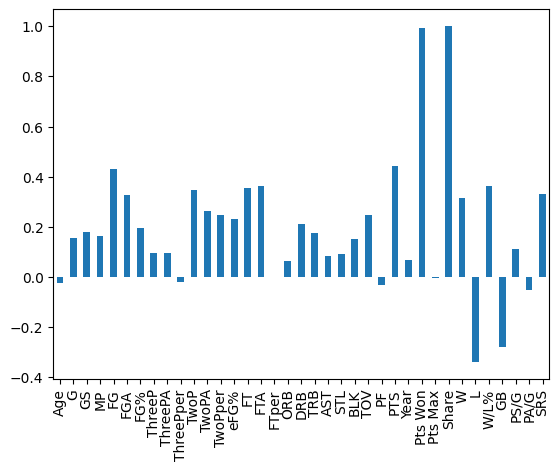

In [ ]:
statistics_df.corr()['Share'].plot.bar()

In [ ]:
pred_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FTper', 'ThreeP',
       'ThreePA', 'ThreePper', 'TwoP', 'TwoPA', 'TwoPper', 'FT', 'FTA', 'FTper', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'GB', 'SRS']

In [ ]:
y = statistics_df['Share']
X = statistics_df.drop('Share', axis = 1)
X = X[pred_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model1 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Share   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     13.83
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.30e-39
Time:                        04:58:42   Log-Likelihood:                 92.215
No. Observations:                 318   AIC:                            -124.4
Df Residuals:                     288   BIC:                            -11.57
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8623      4.021      0.961      0.3

In [ ]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

VIF(X_train, pred_cols)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Age             1.499396
G               5.814509
GS              4.909316
MP              3.439946
FG           3500.520136
FGA          7043.397378
FTper                inf
ThreeP               inf
ThreePA       826.296883
ThreePper    3325.627772
TwoP            1.980741
TwoPA        1753.125077
TwoPper      6724.099744
FT             13.606881
FTA           687.611237
FTper          61.202024
ORB                  inf
DRB                  inf
TRB           551.980265
AST          2752.812299
STL          5098.714638
BLK             4.477872
TOV             1.979232
PF              2.817542
PTS             2.925809
Year            2.137768
W            5704.053607
L               2.638151
GB              5.488156
SRS             8.258928
dtype: float64

In [ ]:
cols = ['Age', 'G', 'GS', 'MP', 'FGA',
       'ThreePA', 'TwoPA','FTA',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'GB', 'SRS']

In [ ]:
drop_cols = ["FG","FTper","ThreeP","ThreePper",'TwoP', 'TwoPper', 'FT', 'FTper' , 'ORB', 'DRB',
             'TRB' , 'W/L%', 'PS/G', 'PA/G', 'eFG%']
updated_data = statistics_df.drop(drop_cols, axis =1)


In [ ]:
train_data, test_data = train_test_split(updated_data, test_size=0.3, random_state=42)

In [ ]:
new_cols = ['Age', 'G', 'GS', 'MP', 'FGA',
       'ThreePA', 'TwoPA','FTA',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'GB', 'SRS']

In [ ]:
formula = 'Share ~ ' + ' + '.join(new_cols)
model2 = smf.ols(formula, data=train_data).fit()
X_test = test_data[new_cols]
y_test = test_data['Share']
y_pred = model2.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_pred - y_test) ** 2)
print(f'Test error is {mse}')

Test error is 0.036417614486133246


In [ ]:
y_pred_around = np.around(y_pred)

acc = (y_pred_around == y_test).sum() / len(y_test)

print("Model Accuracy:", acc)

Model Accuracy: 0.0


## Linear regresion with Multi-Layer Perceptron (MLP)

Test accuracy: 0.9051094890510949
Confusion Matrix with LinerReg with MLP: 
 [[114   7]
 [  6  10]]


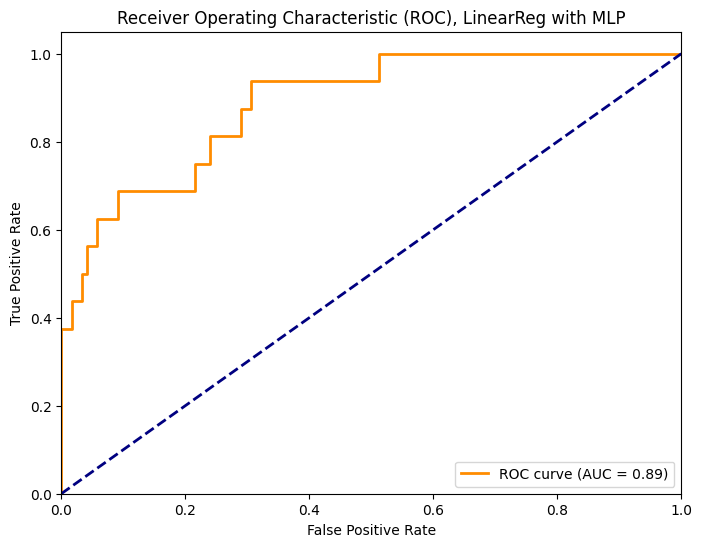

In [ ]:
statistics_df_MLP = statistics_df.copy()

pred_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FTper', 'ThreeP',
       'ThreePA', 'ThreePper', 'TwoP', 'TwoPA', 'TwoPper', 'FT', 'FTA', 'FTper', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'GB', 'SRS']

# Define a threshold for MVP selection, more than 50% of the vote then MVP of the year
threshold = 0.5

# Create a new binary target column 'is_MVP' based on the threshold
statistics_df_MLP['is_MVP'] = (statistics_df_MLP['Share'] >= threshold).astype(int)


# Separate features and target
X = statistics_df_MLP[pred_cols]
y = statistics_df_MLP['is_MVP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0001, batch_size=32, learning_rate_init=0.001, max_iter=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix with LinerReg with MLP: \n",cm)

# Compute the ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC), LinearReg with MLP')
plt.legend(loc="lower right")
plt.show()


#Logistic Regression:

We can see that the values of Variance Inflation Factor for FG, FGA, FG%, 3P, 3PA, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, PTS, W, L, W/L%, PS/G, PA/G, SRS variables are all large. Specifically, the Variance Inflation Factor for FG, FGA, 3PA, 2P, 2PA, DRB, TRB, PTS variables are quite huge. Thus, if we first remove these variables and then measure the Variance Inflation Factor again,

In [ ]:
train_data, test_data = train_test_split(statistics_df, test_size = 0.3, random_state = 42)

In [ ]:
pred_cols = ['Age', 'G', 'GS', 'MP', 'FG%', 'ThreeP', 'ThreePper', 'TwoPper', 'eFG%', 'FT', 'FTA', 'FTper', 'ORB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

VIF(train_data, pred_cols)

Age            1.341583
G              5.799342
GS             4.895845
MP             2.673177
FG%           69.018686
ThreeP        25.707739
ThreePper      2.030818
TwoPper       14.677017
eFG%          54.044226
FT            61.890906
FTA           57.592145
FTper          8.864687
ORB            3.745764
AST            4.277522
STL            1.987384
BLK            2.414944
TOV            2.689073
PF             2.201247
Year           2.213859
W             38.870605
L             74.209421
W/L%         180.603120
GB             3.200957
PS/G         420.883442
PA/G         388.326579
SRS          102.126912
dtype: float64

Then, if we remove 3P, FT, and W/L% variables,

In [ ]:
pred_cols = ['Age', 'G', 'GS', 'MP', 'FG%', 'ThreePper', 'TwoPper', 'eFG%', 'FTA', 'FTper', 'ORB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Year',
       'W', 'L', 'GB', 'SRS']

VIF(train_data, pred_cols)

Age           1.313533
G             5.652959
GS            4.839404
MP            2.311882
FG%          10.414832
ThreePper     1.953417
TwoPper      13.508156
eFG%          8.261254
FTA           2.112868
FTper         2.290794
ORB           3.550738
AST           3.526854
STL           1.855546
BLK           2.329217
TOV           2.548297
PF            2.142804
Year          1.894199
W             5.323223
L             7.644160
GB            3.079111
SRS           8.521642
dtype: float64

If we remove the FG% variable,

In [ ]:
pred_cols = ['Age', 'G', 'GS', 'MP', 'ThreePper', 'TwoPper', 'eFG%', 'FTA', 'FTper', 'ORB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Year',
       'W', 'L', 'GB', 'SRS']

VIF(train_data, pred_cols)

Age          1.310043
G            5.651220
GS           4.816697
MP           2.304642
ThreePper    1.902060
TwoPper      8.411306
eFG%         8.095343
FTA          2.096572
FTper        2.241258
ORB          3.550730
AST          3.520840
STL          1.647517
BLK          2.233743
TOV          2.413772
PF           2.109993
Year         1.583247
W            5.308684
L            7.633496
GB           3.057425
SRS          8.514911
dtype: float64

We can see that the Varince Inflation Factor for some of these variables are still larger than 5. Thus, if we remove the 2P% variable,

In [ ]:
pred_cols = ['Age', 'G', 'GS', 'MP', 'ThreePper', 'eFG%', 'FTA', 'FTper', 'ORB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Year',
       'W', 'L', 'GB', 'SRS']

VIF(train_data, pred_cols)

Age          1.308299
G            5.578460
GS           4.783382
MP           2.249868
ThreePper    1.805803
eFG%         1.360070
FTA          2.048474
FTper        2.138956
ORB          3.409497
AST          3.487042
STL          1.617167
BLK          2.233269
TOV          2.409800
PF           2.088244
Year         1.582506
W            5.290357
L            7.627766
GB           3.051274
SRS          8.510079
dtype: float64

Finally we observe that 'SRS' and 'G' have VIF larger than 5 therefore we can remove 'SRS' and 'G'

In [ ]:
pred_cols = ['Age', 'GS', 'MP', 'ThreePper', 'eFG%', 'FTA', 'FTper', 'ORB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Year',
       'W', 'L', 'GB']

VIF(train_data, pred_cols)

Age          1.284915
GS           1.649021
MP           2.164207
ThreePper    1.800760
eFG%         1.351266
FTA          2.018503
FTper        2.132899
ORB          3.397600
AST          3.450332
STL          1.608000
BLK          2.221155
TOV          2.401252
PF           2.066108
Year         1.560976
W            3.173841
L            3.674408
GB           2.997575
dtype: float64

Now, we can see that the Variance Inflation Factor for the remaining features are all less than 5. Thus, if we first build the logistic regression with these variables,

In [ ]:
train_data = train_data.rename(columns = {'ThreePper' : 'ThreeP_Percent', 'eFG%' : 'eFG_Percent', 'FTper' : 'FT_Percent'})

In [ ]:
import statsmodels.formula.api as smf

logistic_regression = smf.logit(formula = 'Share ~ Age + GS + MP + ThreeP_Percent + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + BLK + TOV + PF + Year + W + L + GB', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.225744
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                           17
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3737
Time:                        04:58:43   Log-Likelihood:                -71.787
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 3.722e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -124.9241     64.394     -1.940      0.052    -251.135       1.287
Age              

We can see that the p values for the coefficients of Age, GS, 3P% (ThreeP_Percent), eFG% (eFG_Percent), FT% (FT_Percent), AST, STL, BLK, TOV, Year, W, and GB are all larger than 0.05. Thus, if we first remove Age variable from the model, and fit the model again,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ GS + MP + ThreeP_Percent + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + BLK + TOV + PF + Year + W + L + GB', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.228538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                           16
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3659
Time:                        04:58:43   Log-Likelihood:                -72.675
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 3.293e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -97.6852     60.361     -1.618      0.106    -215.990      20.620
GS               

If we also remove the 3P% variable from the model and fit the model again,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ GS + MP + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + BLK + TOV + PF + Year + W + L + GB', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.228627
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3657
Time:                        04:58:43   Log-Likelihood:                -72.703
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 1.384e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -99.3545     59.760     -1.663      0.096    -216.482      17.773
GS              0.0503    

If we also remove BLK variable,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ GS + MP + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + TOV + PF + Year + W + L + GB', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.230976
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                           14
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3592
Time:                        04:58:43   Log-Likelihood:                -73.451
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 1.041e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -106.8552     59.187     -1.805      0.071    -222.859       9.148
GS              0.0499    

If we remove GS variable,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ MP + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + TOV + PF + Year + W + L + GB', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.234707
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                           13
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3488
Time:                        04:58:43   Log-Likelihood:                -74.637
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 1.122e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -106.1299     59.211     -1.792      0.073    -222.181       9.921
MP              0.2896    

If we remove TOV variable,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ MP + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + PF + Year + W + L + GB', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.237053
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      305
Method:                           MLE   Df Model:                           12
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3423
Time:                        04:58:51   Log-Likelihood:                -75.383
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 8.073e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -115.5399     58.373     -1.979      0.048    -229.949      -1.131
MP              0.2911    

If we remove GB variable

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ MP + eFG_Percent + FTA + FT_Percent + ORB + AST + STL + PF + Year + W + L', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.237874
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                           11
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3400
Time:                        04:58:51   Log-Likelihood:                -75.644
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 3.675e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -119.2916     57.787     -2.064      0.039    -232.552      -6.031
MP              0.2822    

If we remove STL variable

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ MP + eFG_Percent + FTA + FT_Percent + ORB + AST + PF + Year + W + L', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.239454
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                           10
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3357
Time:                        04:59:00   Log-Likelihood:                -76.146
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 1.989e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -111.4486     56.964     -1.956      0.050    -223.096       0.199
MP              0.2964    

If we remove Year variable,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ MP + eFG_Percent + FTA + FT_Percent + ORB + AST + PF + W + L', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.242624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      308
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3269
Time:                        04:59:00   Log-Likelihood:                -77.154
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 1.633e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -21.4310      5.783     -3.706      0.000     -32.766     -10.096
MP              0.2150    

Lastly, if we remove W variable,

In [ ]:
logistic_regression = smf.logit(formula = 'Share ~ MP + eFG_Percent + FTA + FT_Percent + ORB + AST + PF + L', data = train_data).fit()

print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.246603
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Share   No. Observations:                  318
Model:                          Logit   Df Residuals:                      309
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.3158
Time:                        04:59:00   Log-Likelihood:                -78.420
converged:                       True   LL-Null:                       -114.62
Covariance Type:            nonrobust   LLR p-value:                 1.636e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -20.5274      5.655     -3.630      0.000     -31.612      -9.443
MP              0.2240    

We can see that the p values for the coefficients of the remaining variables are all less than 0.05 which implies that these coefficients are statistically significant. Thus, if we predict the our dependent variable, 'Share', with this model using the test set,

In [ ]:
test_data = test_data.rename(columns = {'ThreePper' : 'ThreeP_Percent', 'eFG%' : 'eFG_Percent', 'FTper' : 'FT_Percent'})

In [ ]:
predicted_probabilities = logistic_regression.predict(test_data)

Now, if we say the cutoff is 0.5,

In [ ]:
predictions = pd.Series([1 if x > 1/2 else 0 for x in predicted_probabilities], index = predicted_probabilities.index)
predictions

302    0
39     0
393    0
411    0
155    0
      ..
195    0
211    0
26     0
7      0
414    0
Length: 137, dtype: int64

In [ ]:
test_data['Rank'] = test_data['Rank'].astype('string')
test_data[test_data['Rank'] == '1']['Share']

168    0.880
291    0.888
324    0.934
153    0.952
404    0.839
334    0.961
110    0.977
250    0.991
Name: Share, dtype: float64

In [ ]:
test_data[test_data['Rank'] == '2']['Share']

238    0.735
246    0.337
11     0.655
181    0.746
131    0.531
Name: Share, dtype: float64

In [ ]:
test_data['Is_MVP'] = test_data['Share'] >= 0.8
test_data['Is_MVP'] = test_data['Is_MVP'].astype(int)
test_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Rank,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Is_MVP
302,Luka Dončić,PG,21,DAL,66,66,34.3,9.8,20.5,0.479,...,6,Dallas Mavericks,42,30,0.583,0.0,112.4,110.2,2.26,0
39,Blake Griffin,PF,25,LAC,67,67,35.2,8.6,17.1,0.502,...,8T,Los Angeles Clippers,56,26,0.683,11.0,106.7,100.1,6.80,0
393,Stephen Curry,PG,24,GSW,78,78,38.2,8.0,17.8,0.451,...,11,Golden State Warriors,47,35,0.573,9.0,101.2,100.3,1.32,0
411,Terry Porter,PG,27,POR,81,81,32.9,6.0,11.7,0.515,...,9T,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47,0
155,Gilbert Arenas,PG,23,WAS,80,80,40.9,8.2,19.0,0.431,...,12,Washington Wizards,45,37,0.549,14.0,100.5,100.8,-0.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Jermaine O'Neal,PF,25,IND,78,78,35.7,7.8,17.9,0.434,...,3,Indiana Pacers,61,21,0.744,0.0,91.4,85.6,4.93,0
211,John Stockton,PG,32,UTA,82,82,35.0,5.2,9.6,0.542,...,8,Utah Jazz,60,22,0.732,2.0,106.4,98.4,7.76,0
26,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,...,6,Los Angeles Lakers,52,19,0.732,0.0,113.4,107.6,6.28,0
7,Allen Iverson,PG,29,PHI,75,75,42.3,10.3,24.2,0.424,...,5,Philadelphia 76ers,43,39,0.524,2.0,99.1,99.9,-1.07,0


Now, if we compute the confusion matrix,

In [ ]:
cm = confusion_matrix(test_data['Is_MVP'], predictions)
cm

array([[126,   3],
       [  5,   3]])

In this case, there are 126 True Negatives, 3 False Positives, 5 False Negatives, and 3 True Positives. Thus, if we compute the accuracy of the logistic regression model,

In [ ]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
accuracy

0.9416058394160584

The accuracy of the model is about 0.9416. This implies that the probability that our logistic regression model will correctly predict whether the new player would be an MVP or not is about 0.9416.

Now, if we also plot the ROC curve,

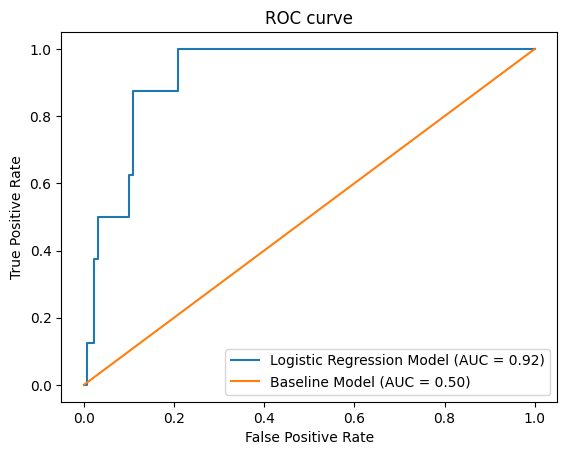

In [ ]:
false_positive_rate, true_positive_rate, _ = roc_curve(test_data['Is_MVP'], predicted_probabilities)
auc_logistic_regression = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, label = 'Logistic Regression Model (AUC = {:0.2f})'.format(auc_logistic_regression))
plt.plot([0, 1], [0, 1], label = 'Baseline Model (AUC = 0.50)')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

#K-fold Cross Validation with a Decision Tree Regressor:

In [ ]:
train_data, test_data = train_test_split(updated_data, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

dtc = DecisionTreeRegressor()
dtc_cv_acc = GridSearchCV(dtc, param_grid=grid_values, scoring='neg_mean_squared_error', cv=10, verbose=1)
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,-0.056921
1,0.0005,-0.056370
2,0.001,-0.058004
3,0.0015,-0.057247
4,0.002,-0.058560
5,0.0025,-0.060606
6,0.003,-0.062910
7,0.0035,-0.065317
8,0.004,-0.060329
9,0.0045,-0.060542


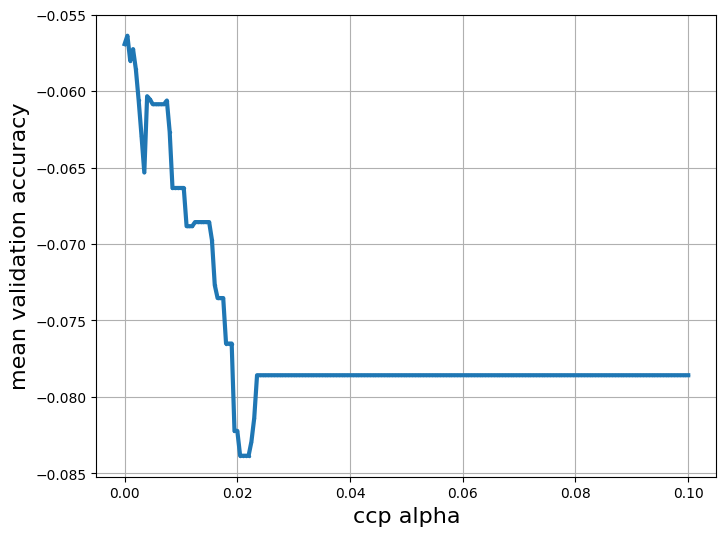

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0005
Grid best score (accuracy):  -0.056369542200905634


In [ ]:
# get the best hyperparameters found during the search
best_params = dtc_cv_acc.best_params_

# initialize a new instance of the DecisionTreeRegressor with the best hyperparameters
dtc_best = DecisionTreeRegressor(**best_params)

# fit the model to the training data
dtc_best.fit(X_train, y_train)

# make predictions on the test data
y_pred = dtc_best.predict(X_test)

In [ ]:
# compute the accuracy on the test set
accuracy = dtc_best.score(X_test, y_test)
print(accuracy)

-0.04993347892782918


#Random Forest:

In [ ]:
pred_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FTper', 'ThreeP',
       'ThreePA', 'ThreePper', 'TwoP', 'TwoPA', 'TwoPper', 'FT', 'FTA', 'FTper', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'GB', 'SRS']

In [ ]:
train = statistics_df[statistics_df['Year'] < 2021]
test = statistics_df[statistics_df['Year'] == 2021]

In [ ]:
random_forest = RandomForestRegressor(n_estimators= 70, random_state= 42, min_samples_split= 5)

In [ ]:
random_forest.fit(train[pred_cols], train['Share'])

RandomForestRegressor(min_samples_split=5, n_estimators=70, random_state=42)

In [ ]:
prediction = random_forest.predict(test[pred_cols])

In [ ]:
prediction = pd.DataFrame(prediction, columns= ['prediction'], index= test.index)

In [ ]:
prediction

,prediction
32,0.041079
74,0.167359
88,0.171576
112,0.024540
154,0.517207
185,0.191988
206,0.428970
217,0.066603
234,0.124924
300,0.199529


In [ ]:
merged_df = pd.concat([test[['Player', 'Share']], prediction], axis= 1)

In [ ]:
merged_df

,Player,Share,prediction
32,Ben Simmons,0.003,0.041079
74,Chris Paul,0.138,0.167359
88,Damian Lillard,0.038,0.171576
112,Derrick Rose,0.010,0.024540
154,Giannis Antetokounmpo,0.345,0.517207
185,James Harden,0.001,0.191988
206,Joel Embiid,0.580,0.428970
217,Julius Randle,0.020,0.066603
234,Kawhi Leonard,0.001,0.124924
300,LeBron James,0.001,0.199529


In [ ]:
merged_df.sort_values('Share', ascending= False).head(10)

,Player,Share,prediction
334,Nikola Jokić,0.961,0.215271
206,Joel Embiid,0.580,0.428970
400,Stephen Curry,0.449,0.334759
154,Giannis Antetokounmpo,0.345,0.517207
74,Chris Paul,0.138,0.167359
302,Luka Dončić,0.042,0.214632
88,Damian Lillard,0.038,0.171576
217,Julius Randle,0.020,0.066603
112,Derrick Rose,0.010,0.024540
362,Rudy Gobert,0.008,0.206550


In [ ]:
merged_df.sort_values('prediction', ascending= False).head(10)

,Player,Share,prediction
154,Giannis Antetokounmpo,0.345,0.517207
206,Joel Embiid,0.580,0.428970
400,Stephen Curry,0.449,0.334759
334,Nikola Jokić,0.961,0.215271
302,Luka Dončić,0.042,0.214632
362,Rudy Gobert,0.008,0.206550
300,LeBron James,0.001,0.199529
185,James Harden,0.001,0.191988
88,Damian Lillard,0.038,0.171576
74,Chris Paul,0.138,0.167359


In [ ]:
def find_average_percentage(merged_df):
  actual = merged_df.sort_values(by= 'Share', ascending = False).head(5)
  predicted = merged_df.sort_values(by= 'prediction', ascending= False)
  pred_list = []
  found = 0
  seen = 1
  for index, row in predicted.iterrows():
    if row['Player'] in actual['Player'].values:
      found += 1
      pred_list.append(found/seen)
    seen += 1
  return sum(pred_list)/ len(pred_list)

In [ ]:
print("Model Accuracy:", find_average_percentage(merged_df))

Model Accuracy: 0.9
